In [20]:
import argparse
from typing import Optional

import pandas as pd
from pandas import DataFrame
import seaborn as sns

import common as cm



In [21]:
df = cm.load_data_or_throw("data.csv")

# Attribute information

    1) ID number
    2) Diagnosis (M = malignant, B = benign)
    3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

- Missing attribute values: none

- Class distribution: 357 benign, 212 malignant

[source: Wisconsin Diagnostic Breast Cancer (WDBC)](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names)

In [32]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
print(pd.DataFrame({
    'count': df['diagnosis'].value_counts(),
    'proportion': df['diagnosis'].value_counts(normalize=True)
}))

           count  proportion
diagnosis                   
B            357    0.627417
M            212    0.372583


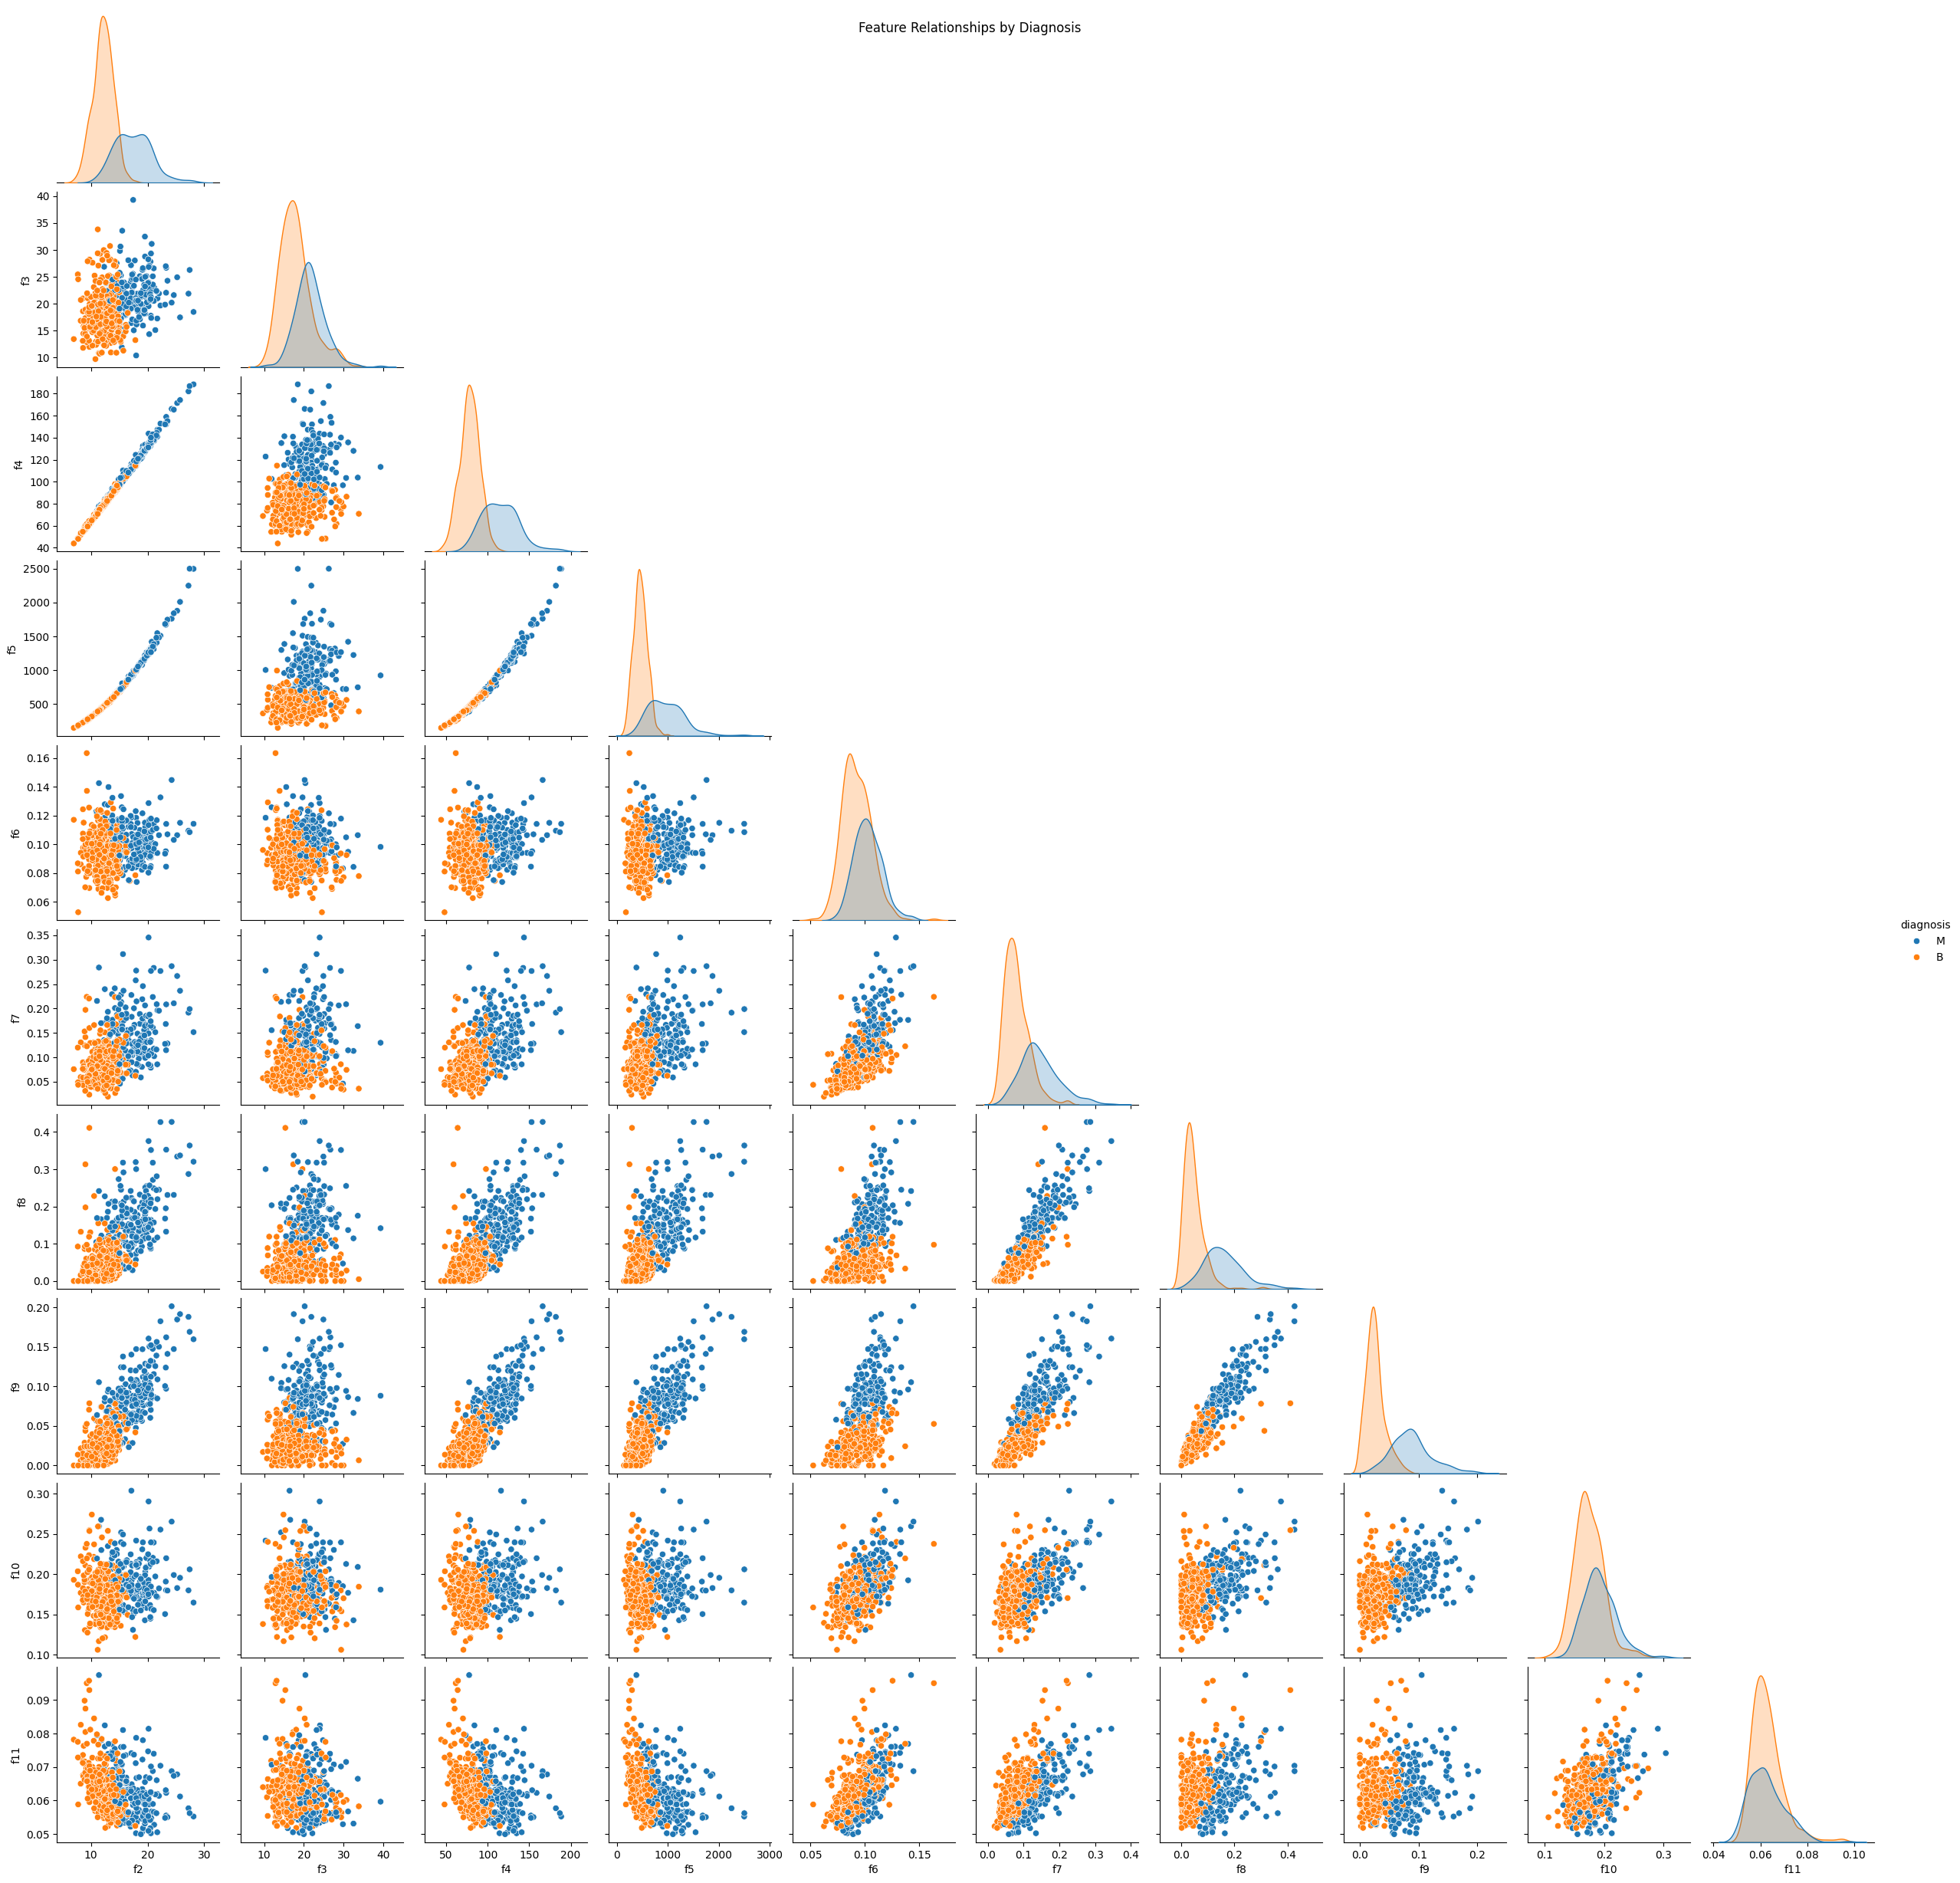

In [35]:
features = [f"f{i}" for i in range(2,12)] # the mean values for cell nucleus
sns.pairplot(df[features + ['diagnosis']], hue='diagnosis', corner=True)
plt.suptitle("Feature Relationships by Diagnosis")
plt.show()

Based on the diagram above, the f2 and f4 and f5 all look to be in a liner-ish relationship. Which makes some sense, the radius (f2) is directly related to the area (f5) and the perimiter (f4).

Maybe only one of these features could be used?